# Chapter 8 Notes



The bootstrap method allows to estimate the distribution of a statistic and its confidence interval using experimental data. 


The bootstrap method consists of two steps: 

1. Estimate $\mathbb{V}_F(T_n)$ with $\mathbb{V}_{\hat{F}_n}(T_n)$
2. Approximate $\mathbb{V}_{\hat{F}_n}(T_n)$ using simulation 

### Simulation

Let $T_n = g(X_1,X_2,... X_n)$ <br> 
The law of large number can be used to prove a statistic estimated from a sample converges in probability to the mean of that statistic. 

$$\dfrac{1}{B}\sum_{i=1}^ng(X_i) \xrightarrow {P} \mathbb{E}(g(X))$$

For instance, this is applicable to the variance: <br> 

$$\dfrac{1}{B}\sum_{i=1}^B(X_i - \bar{X})^2 = \dfrac{1}{B}\sum_{i=1}^BX_i^2 - \big(\dfrac{1}{B}\sum_{i=1}^BX_i\big)^2 \xrightarrow {P} \mathbb{E}(X^2) - \mathbb{E}(X)^2 = \mathbb{V}(X)$$

The law of large number shows the variance can be approximated using a large sample. 

### Bootstrap variance estimation

1. Draw n samples with replacement from $\hat{F}_n(x)$: <br> 
$X_1^{*},X_2^{*}, \dots X_n^{*} \sim \hat{F}_n(x)$

2. Compute static using the sample of size n: <br> 
$T_{n,1}^{*} = g(X_1^{*},X_2^{*}, \dots X_n^{*})$ 

3. Repeate step 1 and 2 B times to obtain: <br> 
$T_{n,1}^{*},T_{n,2}^{*} \dots T_{n,B}^{*}  $ 

4. Compute $v_{boot}$: <br> 
$v_{boot} = \dfrac{1}{B}\sum_{i=1}^B \big(T_{n,i}^{*} - \dfrac{1}{B}\sum_{i=1}^BT_{n,i}^{*}\big)^2$


There are two approximations involved when computing the variance of a statistic using the bootstrap method: 
$$\mathbb{V}_F(T_n) \approx \mathbb{V}_{\hat{F}_n}(T_n) \approx v_{boot}$$


### Bootstrap Confidence intervals

1. <b>The Normal interval</b> <br> 
Compute $C = T_n \pm \sqrt{v_{boot}} z_{\alpha/2} $ <br>
where $z_{\alpha/2} = \Phi^{-1}(1 - \alpha/2)$ <br> 
This interval is not accurate unless the distribution of $T_n$ is close to normal. <br> 


2. <b>Pivotal interval</b> <br>
Let $\theta = T(F)$ and $\hat{\theta}_n = T(\hat{F}_n)$ and define the <b>pivot</b> $R_n = \hat{\theta}_n - \theta$ <br> 
Let $\hat{\theta}_{n,1}^* \dots \hat{\theta}_{n,B}^*$ denote the boostrap replication of $\hat{\theta}_n$. <br> 
Let $H(r)$ be the CDF of the pivot: $H(r) = \mathbb{P}_R(R_n \leq r)$ <br> 
Let $a = \hat{\theta}_n - H^{-1}(1 - \alpha/2)$ and $b = \hat{\theta}_n - H^{-1}(\alpha/2)$ <br> 
$\mathbb{P}(a < \theta < b)$ <br> 
$= \mathbb{P}(a-\hat{\theta}_n < \theta-\hat{\theta}_n < b-\hat{\theta}_n)$ <br> 
$= \mathbb{P}(\hat{\theta}_n - b < \hat{\theta}_n - \theta < \hat{\theta}_n - a)$ <br> 
$= \mathbb{P}(\hat{\theta}_n - b <  R_n < \hat{\theta}_n - a)$ <br> 
$= H(\hat{\theta}_n - a) - H(\hat{\theta}_n - b )$ <br> 
$= H(H^{-1}(1 - \alpha/2)) - H(H^{-1}(\alpha/2))$ <br>
$= 1 - \alpha$ <br>
Unfortunately, $H(r)$ cannot be evaluated exactly. An empirical distribution can be used instead: <br> 
$\hat{H}(r) = \sum_{i=1}^n I(X_i < r) / n$ <br> 
Hence, we have an exact 1-$\alpha$ confidence interval, but $H$ remains unknown are have to use an estimate for it: <br> 
$\hat{H}(r) = B^{-1}\sum_{b=1}^BI(R_{b,n}^{*} \leq r)$ <br>
where $R_{b,n}^* = \hat{\theta}_{b,n}^* - \hat{\theta}_n$ <br> 
Let $r_{\beta}^*$ denote the $\beta$ sample quantile of $(R_{n,1}^*,\dots,R_{n,B}^*)$ and $\theta_{\beta}^*$ denote the $\beta$ sample quantile of $(\hat{\theta}_{n,1}^* \dots \hat{\theta}_{n,B}^*)$. Notice $\theta_{\beta}^* - \hat{\theta}_n = r_{\beta}^*$ <br> 
The bounds expressed earlier: 
$$\hat{a} = \hat{\theta}_n - \hat{H}^{-1}(1-\alpha/2) = \hat{\theta}_n - r_{1-\alpha/2}^* = \hat{\theta}_n - (\theta_{1-\alpha/2}^* - \hat{\theta}_n) = 2\hat{\theta}_n - \theta_{1-\alpha/2}^*$$
$$\hat{b} = \hat{\theta}_n - \hat{H}^{-1}(\alpha/2) = \hat{\theta}_n - r_{\alpha/2}^* = \hat{\theta}_n - (\theta_{\alpha/2}^* - \hat{\theta}_n) = 2\hat{\theta}_n - \theta_{\alpha/2}^*$$
Finally, the $1-\alpha$ bootstrap pivotal confidence interval is: <br> 
$C_n = \big(2\hat{\theta}_n - \hat{\theta}_{1-\alpha/2}^*, 2\hat{\theta}_n - \hat{\theta}_{\alpha/2}^*\big)$
3. Percentile interval: <br> 
$C_n = \big(\hat{\theta}_{\alpha/2}^*, \hat{\theta}_{1-\alpha/2}^*\big)$




# Chapter 8 Exercises

### Exercise 8.1

Plug-in estimator for correlation


$\rho = cov(X,Y)/\sigma_X\sigma_Y = \dfrac{\int\int(y-\mu_Y)(x-\mu_X)dF_xdF_y}{\sqrt{\int(x-\mu_x)dx \int(y-\mu_y)dy}} $ <br> 
$ \hat{\rho} = \dfrac{\sum\sum_{i,j}(Y_i-\mu_Y)(X_j-\mu_X)}{\sqrt{\sum_i(X_i-\bar{X})^2\sum_j(Y_j-\bar{Y})^2}}$ 



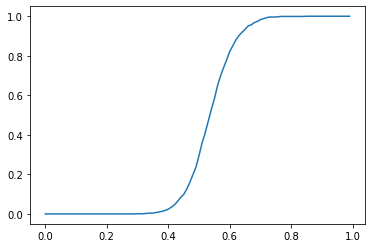

Standard Error estimate: 0.0678
Normal interval: (0.4158, 0.6814)
Pivotal interval: (0.3972, 0.6872)
Percentile interval: (0.41, 0.7)


In [253]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

LSAT = [576, 635, 558, 578, 666, 580, 555, 661, 651, 605, 653, 575, 545, 572, 594]
GPA = [3.39, 3.30, 2.81, 3.03, 3.44, 3.07, 3.00, 3.43, 3.36, 3.13, 3.12, 2.74, 2.76, 2.88, 3.96]

n = len(LSAT)
B = 100


def var(X): 
    mu = np.mean(X)
    return np.sum((X-mu)**2)/len(X)

def rho_hat(lsat,gpa): 
    mu_lsat = np.sum(lsat)/len(lsat)
    mu_gpa = np.sum(gpa)/len(gpa)
    term_1 = 0
    term_2 = 0
    term_3 = 0
    for i in range(0, len(lsat)): 
        term_1 += (gpa[i] - mu_gpa)*(lsat[i] - mu_lsat)
        term_2 += (lsat[i] - mu_lsat)**2
        term_3 += (gpa[i] - mu_gpa)**2  
    return  term_1 / np.sqrt(term_2*term_3)

# returns the inverse of the CDF F(x) evaluated at F^{-1}(p)
def invF(F,x,p): 
    for i in range(0,len(x)): 
        if F[i] >= p: 
            return x[i]
    return x[end]

K = 1000
theta = np.empty([K])
for i in range(0,K): 
    sample_indices = np.random.randint(n,size=[1,B])
    lsat = np.take(LSAT, sample_indices)[0]
    gpa = np.take(GPA, sample_indices)[0]
    theta[i] =  rho_hat(lsat, gpa)


N = 100 # bin number
lb = 0
up = 1
bounds = np.linspace(lb,up,N+1)
bin_count = np.zeros(len(bounds)-1)
for t in theta:
    i = int((t - lb)/(up-lb)*N)
    bin_count[i] += 1


c = np.cumsum(bin_count)/sum(bin_count)
x = bounds[:-1]

  
plt.figure(1)
plt.plot(x, F_x)
plt.show()


theta_hat = np.sum(theta)/len(theta)
se = np.sqrt(var(theta))
Z_0p975 = stats.norm.ppf(1-0.05/2)
theta_0p975 = invF(F_x,bounds[:-1], 0.975)
theta_0p025 = invF(F_x,bounds[:-1], 0.025)


print("Standard Error estimate: " + str(round(se,4)))
print("Normal interval: (" + str(round(theta_hat - Z_0p975*se ,4)) + ", " + str(round(theta_hat + Z_0p975*se,4)) + ")")
print("Pivotal interval: (" + str(round(2*theta_hat - theta_0p975,4)) + ", " + str(round(2*theta_hat - theta_0p025,4)) + ")")
print("Percentile interval: (" + str(round(theta_0p025,4)) + ", " + str(round(theta_0p975,4)) + ")")


### Exercise 8.2


Normal interval: [0.904, 3.476]
Pivotal method interval: [0.990, 3.409]
Percentile method interval: [0.972, 3.390]


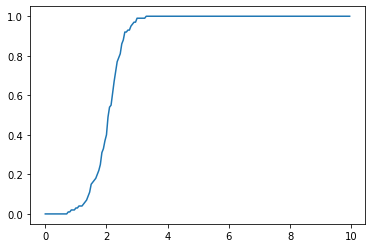

In [394]:
%reset -f

import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt


n = 50  # number of initial points / sample size used to compute one statistic instance 
B = 100 # number of statistic instances


ite_max = 500 # number of repetition of bounds estimation 

norm_lb = np.empty(ite_max) 
norm_ub = np.empty(ite_max)
pivo_lb = np.empty(ite_max) 
pivo_ub = np.empty(ite_max)
perc_lb = np.empty(ite_max) 
perc_ub = np.empty(ite_max)

for ite in range(0, ite_max): 
    Y = stats.norm.rvs(size = n)
    X = np.exp(-Y)

    def skw(X): 
        mu = np.mean(X)
        n = len(X)
        term1 = (np.sum((X - mu)**3)/n)
        term2 = (np.sum((X - mu)**2)/n)**(3/2)
        return term1 / term2

    # returns the inverse of the CDF F(x) evaluated at F^{-1}(p)
    def invF(F,x,p): 
        for i in range(0,len(x)): 
            if F[i] >= p: 
                return x[i]
        return x[end]

    # generate groups of samples using bootstrap method 
    K = n
    theta = np.empty([B])
    for i in range(0,B): 
        sample_indices = np.random.randint(n,size=[1,K])
        X_sampled = np.take(X, sample_indices)[0]
        theta[i] =  skw(X_sampled)

    # compute F(x)
    N = 200 # bin number
    lb = 0
    up = 10
    bounds = np.linspace(lb,up,N+1)
    bin_count = np.zeros(len(bounds)-1)
    for t in theta:
        i = int((t - lb)/(up-lb)*N)
        if i >= N:
            i = N - 1
        bin_count[i] += 1

    F_x = np.cumsum(bin_count/np.sum(bin_count))
    x = bounds[:-1]

    mu_hat = np.mean(theta)


    
    # Normal interval 
    se_hat = np.var(theta)**0.5

    Z0p975 = stats.norm.ppf(1-0.05/2)
    norm_lb[ite] = mu_hat + se_hat * stats.norm.ppf(0.05/2)
    norm_ub[ite] = mu_hat + se_hat * stats.norm.ppf(1-0.05/2)
    # Pivotal method interval 
    pivo_lb[ite] = 2*mu_hat - invF(F_x,x,1 - 0.05/2)
    pivo_ub[ite] =  2*mu_hat - invF(F_x,x,0.05/2)
    # percentile method interval 
    perc_lb[ite] = invF(F_x,x,0.05/2)
    perc_ub[ite] = invF(F_x,x,1-0.05/2)

    
print(f'Normal interval: [{np.mean(norm_lb):.3f}, {np.mean(norm_ub):.3f}]')  
print(f'Pivotal method interval: [{np.mean(pivo_lb):.3f}, {np.mean(pivo_ub):.3f}]')
print(f'Percentile method interval: [{np.mean(perc_lb):.3f}, {np.mean(perc_ub):.3f}]')


showCdf = True
if showCdf: 
    plt.plot(x,F_x)

    
    
    
    



### Exercise 8.3

    
    

In [ ]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

n = 25
B = 100

def T(X_sampled):
    X_sampled = np.sort(X_sampled)
    return (X_sampled[int(np.ceil(len(X_sampled)*3/4))] - X_sampled[int(np.ceil(len(X_sampled)/4))]) / 1.34

r = stats.t.rvs(3, size=n)

# generate theta values using bootstrap
theta = np.empty(shape = B)
for j in range(0,B): 
    sampled_ids = np.random.randint(n, size = K )
    X_sampled = np.take(r, sampled_ids)
    theta[j] = T(X_sampled)
    

N = 200 # bin number
lb = 0
up = 5
bounds = np.linspace(lb,up,N+1)
bin_count = np.zeros(len(bounds)-1)
for t in theta:
    i = int((t - lb)/(up-lb)*N)
    if i >= N:
        i = N - 1
    bin_count[i] += 1
F_x = np.cumsum(bin_count/np.sum(bin_count))
x = bounds[:-1]


mu_hat = np.mean(theta)

# Normal interval 
se_hat = np.var(theta)**0.5
Z0p975 = stats.norm.ppf(1-0.05/2)
norm_lb = mu_hat + se_hat * stats.norm.ppf(0.05/2)
norm_ub = mu_hat + se_hat * stats.norm.ppf(1-0.05/2) 
# Pivotal method interval 
pivo_lb = 2*mu_hat - invF(F_x,x,1 - 0.05/2)
pivo_ub =  2*mu_hat - invF(F_x,x,0.05/2)
# percentile method interval 
perc_lb = invF(F_x,x,0.05/2)
perc_ub = invF(F_x,x,1-0.05/2)


print(f'Normal interval: [{norm_lb:.3f}, {norm_ub:.3f}]')  
print(f'Pivotal method interval: [{pivo_lb:.3f}, {pivo_ub:.3f}]')
print(f'Percentile method interval: [{perc_lb:.3f}, {perc_ub:.3f}]')

plt.figure(1)
plt.plot(x,F_x) 
plt.show()

### Exercise 8.4


This problem is equivalent to finding all distinct ways of writing a binary number of length $2N-1$ with $N$ $0$s and $N-1$ $1$s: <br> 
The $1$'s can be seen as boundaries between cells and $0$s as individual elements within a cell. For example: $101011$ implies there are 5 cells where the second and third cells have one element and every other cell is empty. 


In this problem, the total number of binary digits (cells + elements) is $N+N-1 = 2N-1$ <br> 
Within those $2N-1$ digits, $N$ 0's must be placed in an order that is not relevant. This is equivalent to finding every combination of $N$ item in a pool of $2N-1$ items, which can be expressed as: 

$$\dfrac{(2N-1)!}{(N-1)!N!} =  {2N-1 \choose N}$$. 


### Exercise 8.5


<b> Part I: $\mathbb{E}(\bar{X}^*|X)$ </b>

From the definition of $X_i^*$, we have that $X_1^*, \dots X_n^* $ are IID and governed by probability mass function $\mathbb{P}(X_i^* = x_j | X_1, \dots X_n) = 1/n \qquad\forall i,j \in [0, \dots n]$

Therefore, $\mathbb{E}(\bar{X}^*| X_1,\dots x_n) = \mathbb{E}(n^{-1}\sum_{i=1}^n X_i^*|X_1,\dots X_n) = n^{-1}\sum_{i=1}^n \mathbb{E}(X_i^*|x_1,\dots x_n) = 
n^{-1}\sum_{i=1}^n \big( \sum_{j=1}^n n^{-1}x_j  \big) =  n^{-1}\sum_{j=1}^n x_j
$

<b> Part II: $\mathbb{V}(\bar{X}^*|X)$ </b>

Since  $X_1^*, \dots X_n^* $ are IID, their covariance is null. <br> 
$\mathbb{V}(n^{-1}\sum_{i=1}^nX_i| x_1, \dots x_n) = n^{-2}\sum_{i=1}^n\mathbb{V}(X_i| x_1, \dots x_n)
= n^{-2}\sum_{i=1}^n\big( n^{-1}\sum_{j=1}^n(x_j - \bar{x})^2 \big)
= n^{-2}\sum_{j=1}^n(x_j - \bar{x})^2
$


<b> Part III: $\mathbb{E}(\bar{X}^*)$ </b> <br> 
Law of expected iteration can be used here: <br>  
$\mathbb{E}(\bar{X}^*) = \mathbb{E}(\mathbb{E}(\bar{X}^* | X)) = \mathbb{E}( n^{-1}\sum_{j=1}^n X_j) = n^{-1}\sum_{j=1}^n \mathbb{E}(X_j) = \mathbb{E}(X)$


<b> Part IV: $\mathbb{V}(\bar{X}^*)$ </b> <br> 
$\mathbb{V}(\bar{X}^*) = \mathbb{E}(\mathbb{V}(\bar{X}^* | X)) + \mathbb{V}(\mathbb{E}(\bar{X}^* | X))
= \mathbb{E}( n^{-2}\sum_{j=1}^n(X_j - \bar{X})^2) + \mathbb{V}(n^{-1}\sum_{j=1}^n X_j) \\
= n^{-2}\sum_{j=1}^n\mathbb{E}( (X_j - \bar{X})^2) + n^{-2}\mathbb{V}(\sum_{j=1}^n X_j) \\
= n^{-2}\sum_{j=1}^n\mathbb{E}(X_j^2 - 2X_j\bar{X} + \bar{X}^2) + n^{-2}\sum_{j=1}^n \mathbb{V}(X_j)\\
= n^{-2}\big(\sum_{j=1}^n\mathbb{E}(X)^2 - 2n^{-1}\sum_{i=1}^n\sum_{j=1}^n\mathbb{E}(X_jX_i) + n^{-1}\sum_{i=1}^n\sum_{j=1}^n\mathbb{E}(X_jX_i)\big) + n^{-1} \mathbb{V}(X) \\
= n^{-2}\big(n\mathbb{E}(X)^2 - n^{-1}\sum_{i=1}^n\sum_{j=1}^n\mathbb{E}(X_jX_i)\big) + n^{-1} \mathbb{V}(X) \\
= n^{-2}\big(n\mathbb{E}(X)^2 - n^{-1}((n^2-n)\mathbb{E}(X)^2 + n\mathbb{E}(X^2))\big) + n^{-1} \mathbb{V}(X) \quad 
\text{note that: } \mathbb{E}(X_iX_j) = \mathbb{E}(X)^2 \quad\forall i\neq j \quad\text{ and } \mathbb{E}(X_iX_j)= \mathbb{E}(X^2) \quad\forall i=j\\ 
= n^{-2}\big(n\mathbb{E}(X)^2 - ((n-1)\mathbb{E}(X)^2 + \mathbb{E}(X^2))\big) + n^{-1} \mathbb{V}(X) \\
= n^{-1}\mathbb{E}(X)^2 + \dfrac{(1-n)}{n^2}\mathbb{E}(X)^2 - n^{-2}\mathbb{E}(X^2) + n^{-1} \mathbb{V}(X) \\
= n^{-2}\mathbb{E}(X)^2  - n^{-2}\mathbb{E}(X^2) + n^{-1} \mathbb{V}(X) \\
= n^{-1} \mathbb{V}(X) - n^{-2} \mathbb{V}(X) \\
= \dfrac{n-1}{n^2} \mathbb{V}(X)
$


### Exercise 8.6

95% normal confidence interval: [113.332, 172.101] 


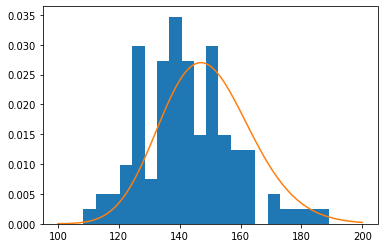

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
from numpy.random import lognormal 

B = 100
n = 100
mu = 5
sigma = 1
X = np.random.normal(mu, sigma, size = n)

T = np.empty(shape=B)
for i in range(0,B): 
    sample_ids = np.random.randint(n, size = n)
    T[i] = np.exp(np.mean(np.take(X, sample_ids)))

# using a normal confidence interval 
T_hat = np.mean(T)
se = np.sqrt(np.var(T))
X_0p975 = norm.ppf(1-0.05/2)
X_0p025 = norm.ppf(0.05/2)
print(f'95% normal confidence interval: [{T_hat + X_0p025*se:.3f}, {T_hat + X_0p975*se:.3f}] ')


# The true sampling distribution is a lognormal distribution with parameters: mu = 5 and sigma = 1/sqrt(n)
x = np.linspace(100, 200,100)
sig = sigma/np.sqrt(n)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sig**2))/ (x * sig * np.sqrt(2 * np.pi)))

plt.figure(1)
plt.hist(T,20,density=True)
plt.plot(x,pdf)
plt.show()







### Exercise 8.7 



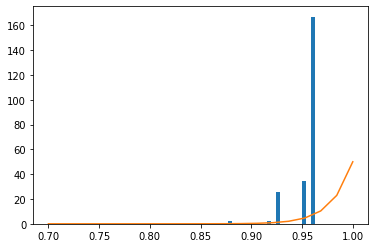

In [529]:
import numpy as np 
import matplotlib.pyplot as plt

n = 50
theta = 1
B = 100
X_ref = np.random.uniform(0, theta, size = n)


X_boot = np.empty(B)
for i in range(0,B): 
    sample_ids = np.random.randint(0,n, size = n)
    X_boot[i] = np.max(np.take(X_ref, sample_ids))

# Solution to exercise 6.6 can be used to compute the exact distribution of max{uniform(0,theta)}
X = np.linspace(0.7,1,20)
pdf = n*X**(n-1)/theta**n

plt.figure(1)
plt.hist(X_boot, 20, density=True)
plt.plot(X,pdf)
plt.show()


Not sure if the author meant $\textit{prove that }\mathbb{P}(\hat{\theta} = \theta) =0 $ instead of $\textit{ prove that }\mathbb{P}(\hat{\theta} = \hat{\theta})$. In the former case, we have that: 

$\hat{\theta} = \text{max}\{X_1,\dots X_n \}$ which means that for $y\in[0\dots \theta]$, $\mathbb{P}(y\leq \hat{\theta}\leq  \theta ) = 1 - \mathbb{P}(0 \leq \hat{\theta} \leq y) = 1 - \mathbb{P}(\text{all} X_i \leq y) = 1 - \big(\dfrac{y}{\theta}\big)^n$ <br> 
$ \hat{\theta} \in [y \dots\theta] \implies \mathbb{P}( \hat{\theta} = \theta) = \lim\limits_{y\rightarrow\theta} \mathbb{P}(y\leq \hat{\theta}\leq  \theta) = \lim\limits_{y\rightarrow\theta} \big(1 - \big(\dfrac{y}{\theta}\big)^n\big) = 0$



$\mathbb{P}(\hat{\theta}^* = \hat{\theta}) = \mathbb{P}(\hat{\theta} \text{ picked at least once in } n \text{ attemps}) = 1 - \mathbb{P}(\hat{\theta} \text{ never picked in } n \text{ attemps}) = 1 - (1-1/n)^n$

As the sample size increases, $\mathbb{P}(\hat{\theta}^* = \hat{\theta})$ approaches the following numerical value: <br> 

$\lim\limits_{x\rightarrow \infty} 1 - (1-1/n)^n \\
= 1 - \lim\limits_{x\rightarrow \infty} (1-1/n)^n \\
= 1 - \lim\limits_{x\rightarrow \infty} exp(\text{ln}((1-1/n)^n))\\
= 1 - exp(\lim\limits_{x\rightarrow \infty} n \text{ln}(1-1/n))\\
= 1 - exp(\lim\limits_{x\rightarrow \infty} \dfrac{\text{ln}(1-1/n)}{n^{-1}})\\
= 1 - exp(\lim\limits_{x\rightarrow \infty} \dfrac{(1-1/n)^{-1}n^{-2}}{-n^{-2}})\\
= 1 - exp(\lim\limits_{x\rightarrow \infty} \dfrac{1}{(1-1/n)})\\
= 1 - exp(-1) \approx 0.6321\\
$



### Exercise 8.7





